In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

import nltk 
from wordcloud import WordCloud
from collections import Counter
import platform
from PIL import Image


In [2]:
df10 = pd.read_excel('online_retail_II.xlsx', sheet_name= 'Year 2009-2010')
df11 = pd.read_excel('online_retail_II.xlsx', sheet_name= 'Year 2010-2011')

In [3]:
retail_df = pd.concat([df10,df11],axis=0)

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [5]:
retail_df['Total'] = retail_df['Quantity']*retail_df['Price']
retail_df['Total'].head(10)

0     83.4
1     81.0
2     81.0
3    100.8
4     30.0
5     39.6
6     30.0
7     59.5
8     30.6
9     45.0
Name: Total, dtype: float64

In [6]:
retail_df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
count,1067371.0,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371,1.067371e+06
unique,53628.0,5305,5698,NaN,NaN,NaN,NaN,43,NaN
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,1350.0,5829,5918,NaN,NaN,NaN,NaN,981330,NaN
mean,NaN,NaN,NaN,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504,NaN,1.806987e+01
min,NaN,NaN,NaN,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,NaN,-1.684696e+05
25%,NaN,NaN,NaN,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,NaN,3.750000e+00
50%,NaN,NaN,NaN,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,NaN,9.900000e+00
75%,NaN,NaN,NaN,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,NaN,1.770000e+01
max,NaN,NaN,NaN,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,NaN,1.684696e+05


In [7]:
retail_df = retail_df.dropna()
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [8]:
retail_df['Customer ID']=retail_df['Customer ID'].astype('int64')
retail_df['Customer ID']=retail_df['Customer ID'].astype('object')
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  object        
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 62.9+ MB


In [9]:
retail_df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
count,824364.0,824364,824364,824364.000000,824364,824364.000000,824364.0,824364,824364.000000
unique,44876.0,4646,5299,NaN,NaN,NaN,5942.0,41,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841.0,United Kingdom,NaN
freq,542.0,5322,5315,NaN,NaN,NaN,13097.0,741301,NaN
mean,NaN,NaN,NaN,12.414574,2011-01-01 22:29:28.042054144,3.676800,NaN,NaN,20.195317
min,NaN,NaN,NaN,-80995.000000,2009-12-01 07:45:00,0.000000,NaN,NaN,-168469.600000
25%,NaN,NaN,NaN,2.000000,2010-07-06 11:58:00,1.250000,NaN,NaN,4.250000
50%,NaN,NaN,NaN,5.000000,2010-12-03 14:26:00,1.950000,NaN,NaN,11.250000
75%,NaN,NaN,NaN,12.000000,2011-07-27 15:14:00,3.750000,NaN,NaN,19.500000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN,168469.600000


In [10]:
retail_df = retail_df[retail_df['StockCode']!='POST']

In [11]:
df1 = retail_df.groupby('Customer ID')
df2 = retail_df.groupby('StockCode')

In [12]:
count_s = df1.count()['Invoice']
stock_c = df2.count()['Invoice']

#### 고객 ID로 분석

In [13]:
# 구매횟수 - 고객 ID
sort_count = count_s.copy().sort_values(ascending=False)
sort_count_10 = count_s.copy().sort_values(ascending=False).head(10)

In [14]:
sort_count_10

Customer ID
17841    13097
14911    11612
12748     7302
14606     6708
14096     5128
15311     4717
14156     4130
14646     3858
13089     3438
16549     3255
Name: Invoice, dtype: int64

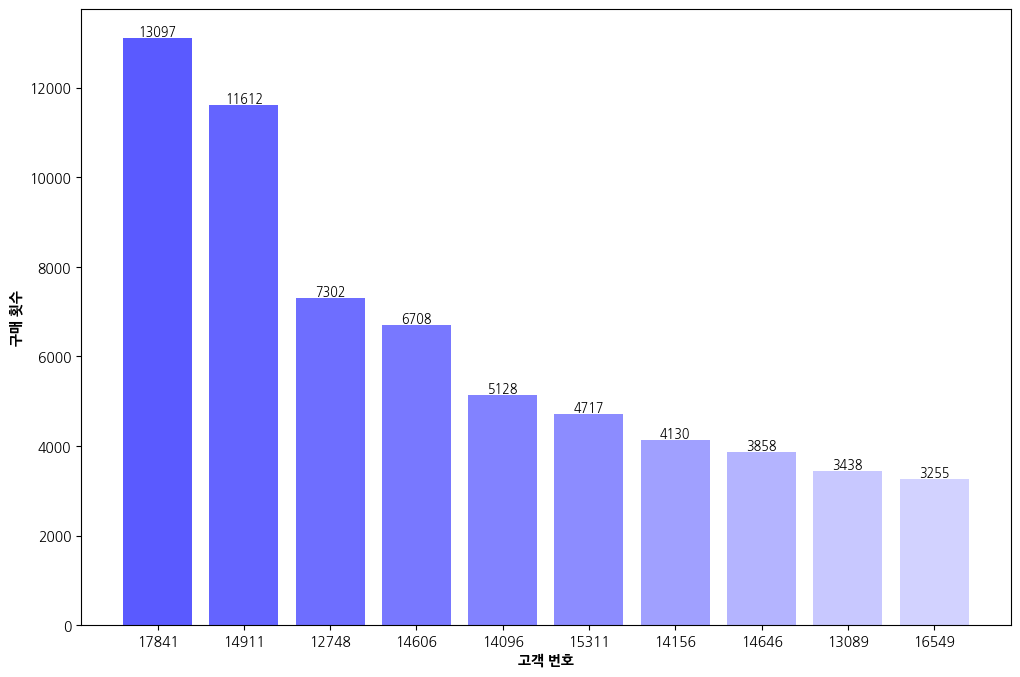

In [15]:
ID = sort_count_10.index.to_list()
ID = list(map(str,ID))
Count = sort_count_10.values.tolist()

colors = ['#5A5AFF','#6464FF','#6E6EFF','#7878FF','#8282FF','#8C8CFF','#A0A0FF','#B4B4FF','#C8C8FF','#D2D2FF']
plt.figure(figsize=(12,8))
sell = plt.bar(ID, Count, color = colors)
plt.xlabel('고객 번호', fontweight = 'bold')
plt.ylabel('구매 횟수', fontweight = 'bold')
plt.bar_label(sell, Count, fontsize = 9)
plt.show()

In [16]:
# 총 구매 금액 - 고객ID
total_cost = df1['Total'].sum()
total = df1['Total'].sum().sort_values(ascending=False)
total_10 = total.sort_values(ascending=False).head(10)

In [17]:
total_10

Customer ID
18102    598215.22
14646    521716.07
14156    296564.69
14911    270273.53
17450    234517.79
13694    190825.52
17511    171888.15
12415    143182.02
16684    141502.25
15061    136391.48
Name: Total, dtype: float64

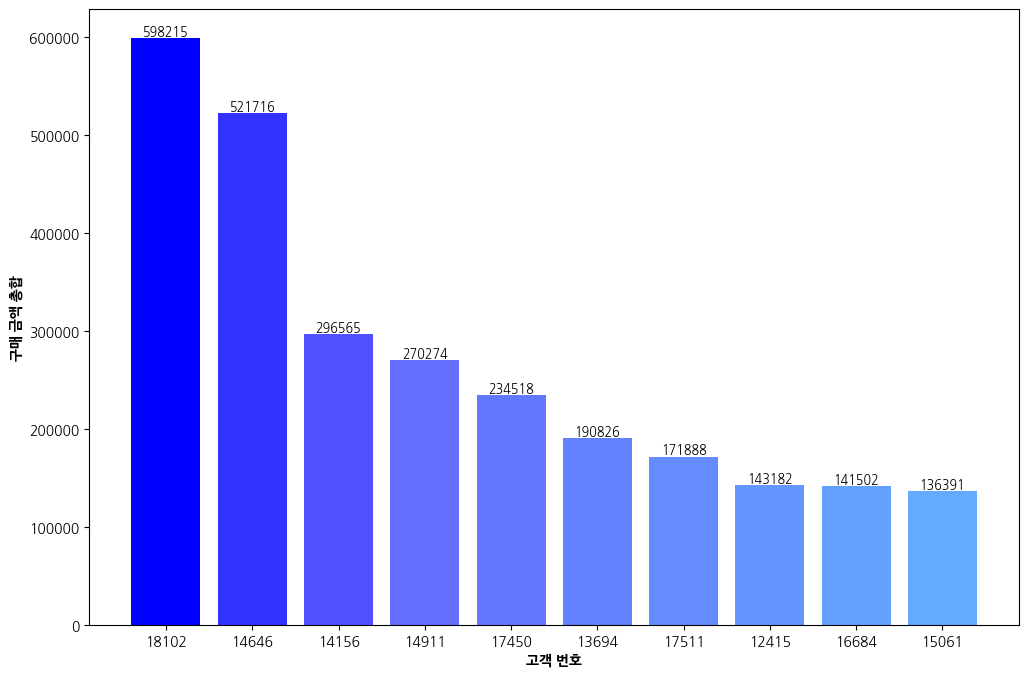

In [18]:
ID = total_10.index.to_list()
ID = list(map(str,ID))
Total = total_10.values.tolist()
Total = list(map(round, Total))

colors = ['#0000FF', '#3232FF', '#5050FF', '#646EFF', '#6478FF', '#6482FF', '#648CFF', '#6496FF', '#64A0FF', '#64AAFF']
plt.figure(figsize=(12,8))
sell = plt.bar(ID, Total, color = colors)
plt.xlabel('고객 번호', fontweight = 'bold')
plt.ylabel('구매 금액 총합', fontweight = 'bold')
plt.bar_label(sell, Total, fontsize = 9)
plt.show()

In [19]:
# 구매횟수, 구매금액 DF 생성
cust_df = pd.concat([count_s,total_cost],axis=1)
cust_df.columns = ['count', 'total_cost']
cust_df

,count,total_cost
Customer ID,,
12346,48,-64.68
12347,253,5633.32
12348,46,1658.40
12349,177,3654.54
12350,16,294.40
...,...,...
18283,986,2736.65
18284,29,436.68
18285,12,427.00


In [20]:
count_df = cust_df.sort_values('count')
count_df = count_df[count_df['total_cost']>=0]

In [21]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5855 entries, 16663 to 17841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   count       5855 non-null   int64  
 1   total_cost  5855 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 137.2 KB


In [22]:
count_df.describe()

,count,total_cost
count,5855.000000,5855.000000
mean,140.355764,2840.377714
std,361.731050,14048.269562
min,1.000000,0.000000
25%,21.000000,335.420000
50%,54.000000,859.350000
75%,145.000000,2215.850000
max,13097.000000,598215.220000


In [23]:
x = np.array(count_df['total_cost'])
np.percentile(x,80)

2880.1659999999997

In [24]:
low = count_df[count_df['total_cost']<=np.percentile(x,80)]['total_cost'].to_list()
high = count_df[count_df['total_cost']>np.percentile(x,80)]['total_cost'].to_list()
high_id = count_df[count_df['total_cost']>np.percentile(x,80)].index.to_list()

In [25]:
len(high_id)

1171

In [26]:
# plt.hist(count_df[count_df['count']<=21]['count'])
# plt.title('구매 빈도 25%의 분포', fontweight = 'bold', fontsize = 15)
# plt.xlabel('구매 빈도', fontweight = 'bold')
# plt.xticks(list(range(0,22,2)))
# plt.ylim(0,350)
# plt.show()

In [27]:
low80 = sum(low)
high20 = sum(high)

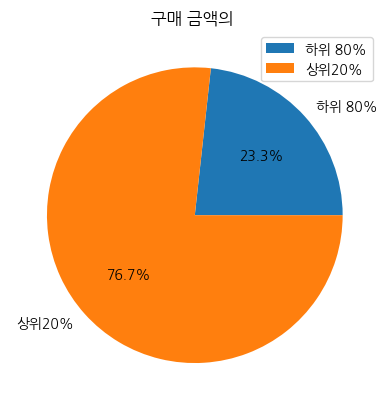

In [28]:
plt.pie([low80,high20], labels=['하위 80%', '상위20%'],autopct='%.1f%%')
plt.title('구매 금액의 ')
plt.legend()
plt.show()

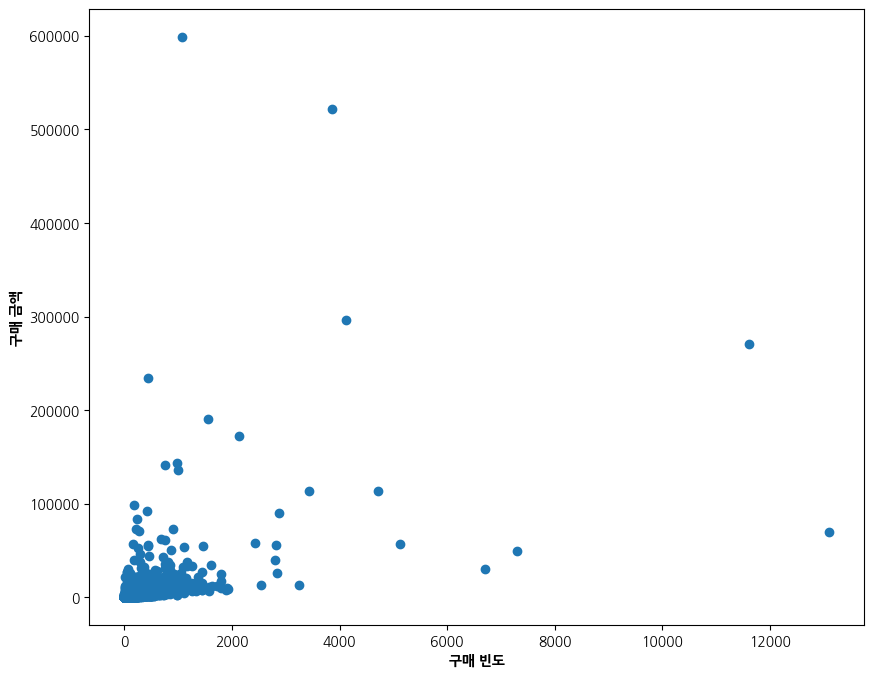

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(count_df['count'],count_df['total_cost'])
plt.xlabel('구매 빈도', fontweight = 'bold')
plt.ylabel('구매 금액', fontweight = 'bold')
plt.show()

In [30]:
con = (count_df['count']<100)&(count_df['total_cost']<2000)

In [31]:
x = count_df[con]['count'].to_list()
y = count_df[con]['total_cost'].to_list()

In [32]:
p1,p2 = np.polyfit(x,y,1)

In [33]:
line = np.array(x)*p1+p2

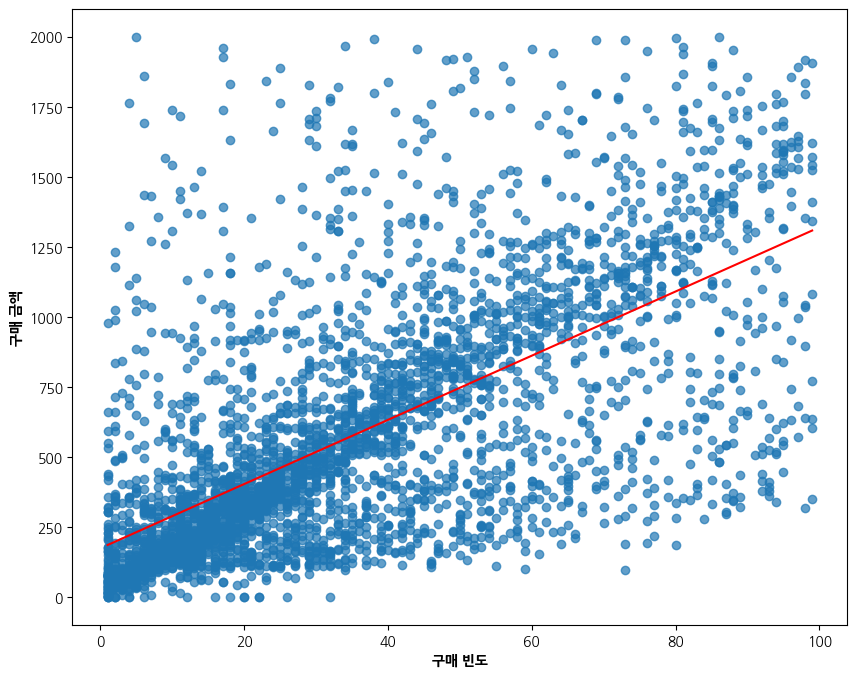

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(count_df[con]['count'],count_df[con]['total_cost'],alpha=0.7)
plt.xlabel('구매 빈도', fontweight = 'bold')
plt.ylabel('구매 금액', fontweight = 'bold')
plt.plot(x,line,color = 'r')
plt.show()

In [35]:
round((count_df[con]['total_cost'].sum()/count_df['total_cost'].sum())*100)

13

In [36]:
def lorenz_curve(x):
    """
    :param x: list, numpy array, or pandas series of values
    :return: matplotlib plot of Lorenz curve
    """
    # convert x to a numpy array
    x = np.asarray(x)

    # sort the array in ascending order
    x = np.sort(x)

    # calculate the cumulative share of total income
    cum_share = np.cumsum(x) / np.sum(x)

    # add (0, 0) to the plot
    lorenz_points = np.insert(cum_share, 0, 0)
    lorenz_points = np.vstack([lorenz_points, np.linspace(0, 1, len(lorenz_points))])

    # plot the Lorenz curve
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(lorenz_points[1], lorenz_points[0], drawstyle='steps-post')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax.set_xlabel('Cumulative share of population')
    ax.set_ylabel('Cumulative share of income')
    ax.set_title('Lorenz Curve')
    plt.show()

#### 상품 코드로 분석

In [37]:
# 구매횟수 - 상품 번호
stock_count = stock_c.copy().sort_values(ascending=False)
stock_count_10 = stock_c.copy().sort_values(ascending=False).head(10)

In [38]:
stock_count_10

StockCode
85123A    5322
22423     3777
85099B    3446
84879     2794
20725     2755
21212     2679
21232     2190
20727     2161
21034     2150
47566     2144
Name: Invoice, dtype: int64

In [71]:
# 총 판매 금액 - 상품코드
stock_total = df2['Total'].sum()
cost_total = df2['Total'].sum().sort_values(ascending=False)
stock_10 = cost_total.head(10)

In [74]:
stock_10

StockCode
22423     269736.70
85123A    242855.86
85099B    168440.36
84879     126354.18
47566     102686.23
22086      78366.93
79321      72229.34
22386      67574.16
21137      67127.15
48138      64614.57
Name: Total, dtype: float64

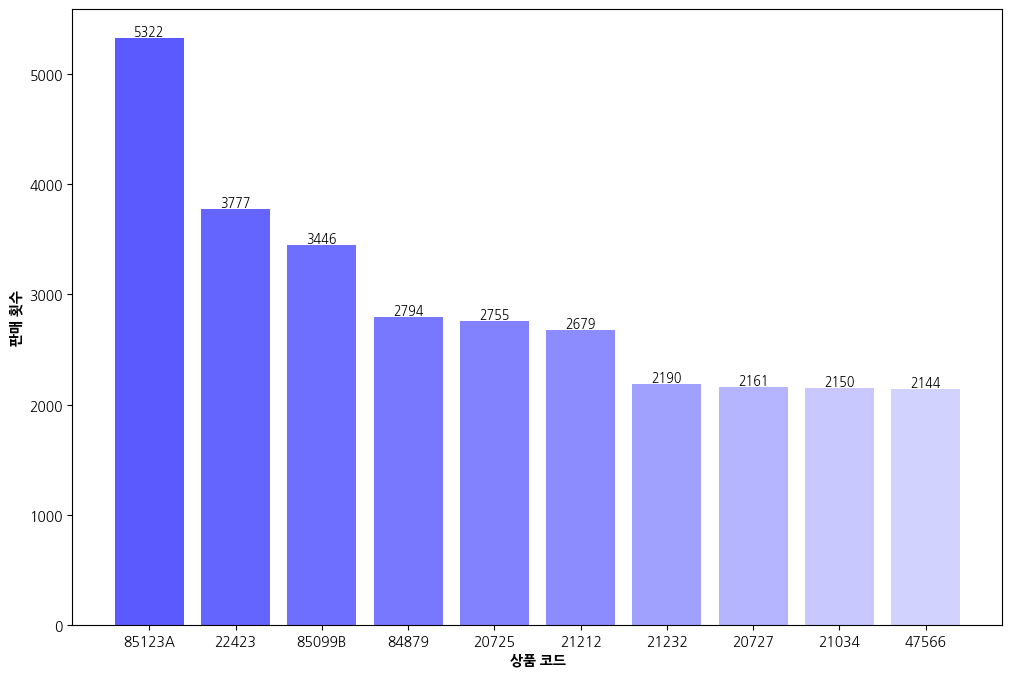

In [41]:
stock = stock_count_10.index.to_list()
stock = list(map(str,stock))
Count = stock_count_10.values.tolist()

colors = ['#5A5AFF','#6464FF','#6E6EFF','#7878FF','#8282FF','#8C8CFF','#A0A0FF','#B4B4FF','#C8C8FF','#D2D2FF']
plt.figure(figsize=(12,8))
sell = plt.bar(stock, Count, color = colors)
plt.xlabel('상품 코드', fontweight = 'bold')
plt.ylabel('판매 횟수', fontweight = 'bold')
plt.bar_label(sell, Count, fontsize = 9)
plt.show()

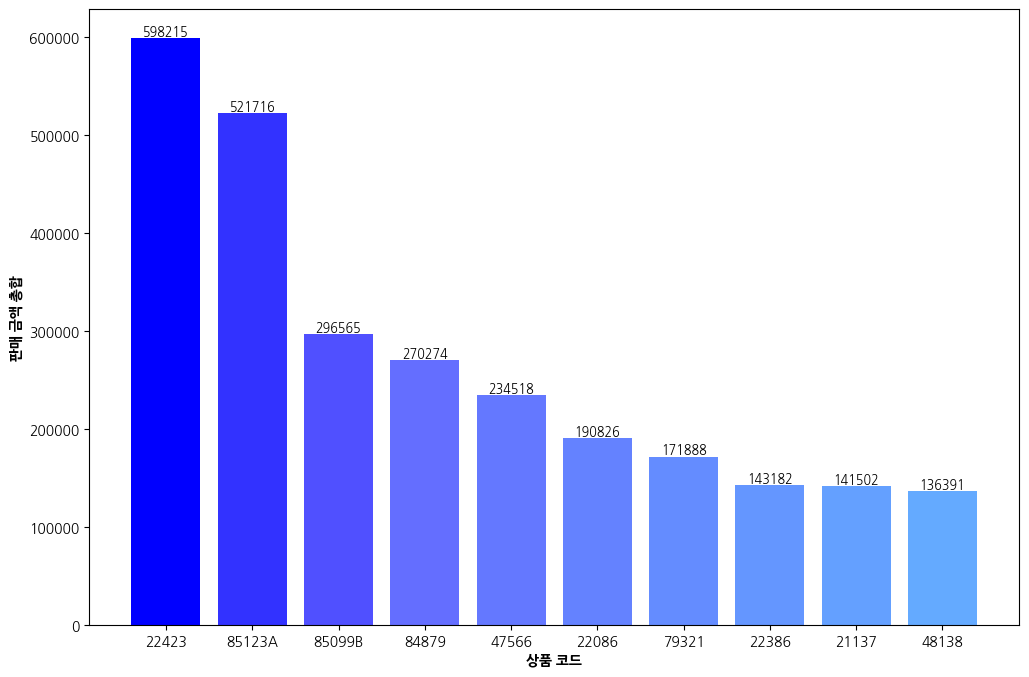

In [42]:
stock_list= stock_10.index.to_list()
stock_list = list(map(str,stock_list))
total = stock_10.values.tolist()
sell_total = list(map(round, Total))

colors = ['#0000FF', '#3232FF', '#5050FF', '#646EFF', '#6478FF', '#6482FF', '#648CFF', '#6496FF', '#64A0FF', '#64AAFF']
plt.figure(figsize=(12,8))
sell = plt.bar(stock_list, sell_total, color = colors)
plt.xlabel('상품 코드', fontweight = 'bold')
plt.ylabel('판매 금액 총합', fontweight = 'bold')
plt.bar_label(sell, sell_total, fontsize = 9)
plt.show()

In [43]:
# 판매횟수, 판매금액 DF 생성
st_df = pd.concat([stock_c, stock_total], axis=1)
st_df.columns = ['sell', 'total_income']
st_df

,sell,total_income
StockCode,,
10002,324,5877.970
10080,27,124.610
10109,1,1.680
10120,67,133.140
10125,133,1601.800
...,...,...
M,1115,-185153.230
PADS,19,-36.583
SP1002,2,14.750


In [95]:
stock_df = st_df.sort_values('total_income',ascending=False)
stock_df = stock_df[stock_df.index != 'DOT']
stock_df = stock_df[stock_df['total_income']>=0]

In [96]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4616 entries, 22423 to 20822
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sell          4616 non-null   int64  
 1   total_income  4616 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 108.2+ KB


In [97]:
corr1 = stock_df.corr(numeric_only=True)
corr1

,sell,total_income
sell,1.000000,0.855937
total_income,0.855937,1.000000


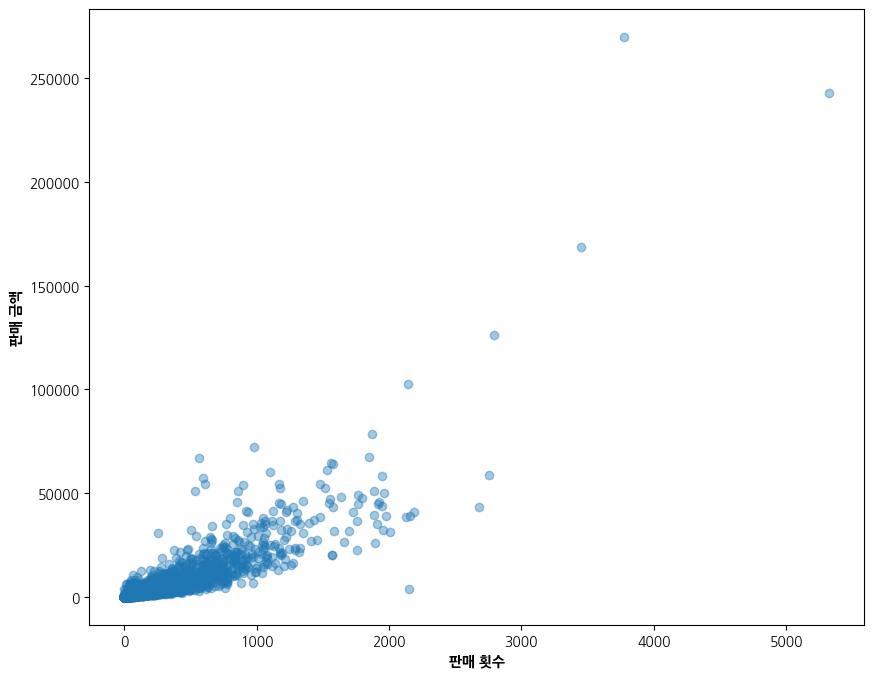

In [98]:
plt.figure(figsize=(10,8))
plt.scatter(stock_df['sell'],stock_df['total_income'], alpha=0.4)
plt.xlabel('판매 횟수', fontweight = 'bold')
plt.ylabel('판매 금액', fontweight = 'bold')
plt.show()

In [99]:
stock_df.describe()

,sell,total_income
count,4616.000000,4616.000000
mean,177.826690,3624.629417
std,299.279829,9526.558945
min,1.000000,0.000000
25%,20.000000,245.925000
50%,70.000000,953.235000
75%,201.000000,3173.427500
max,5322.000000,269736.700000


In [100]:
con = (stock_df['sell']<200) & (stock_df['total_income']<3000)

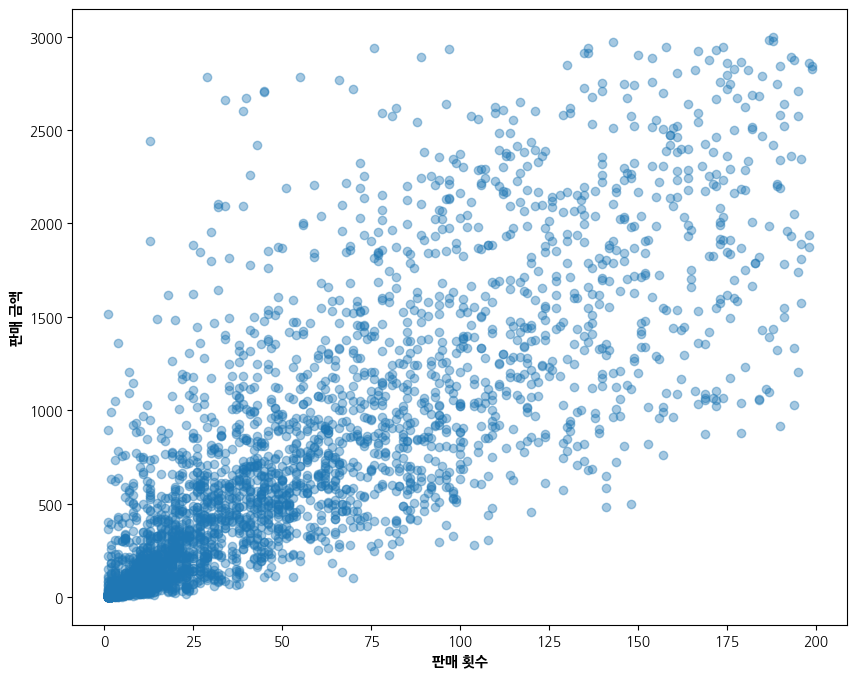

In [101]:
plt.figure(figsize=(10,8))
plt.scatter(stock_df[con]['sell'],stock_df[con]['total_income'], alpha=0.4)
plt.xlabel('판매 횟수', fontweight = 'bold')
plt.ylabel('판매 금액', fontweight = 'bold')
plt.show()

In [102]:
x1 = np.array(stock_df['total_income'])

In [103]:
np.percentile(x1,80)

4159.2

In [104]:
high = stock_df[stock_df['total_income']>np.percentile(x1,80)]['total_income'].values.tolist()
low = stock_df[stock_df['total_income']<=np.percentile(x1,80)]['total_income'].values.tolist()
high_stock = stock_df[stock_df['total_income']>np.percentile(x1,80)].index.tolist()

In [105]:
high20 = sum(high)
low80 = sum(low)

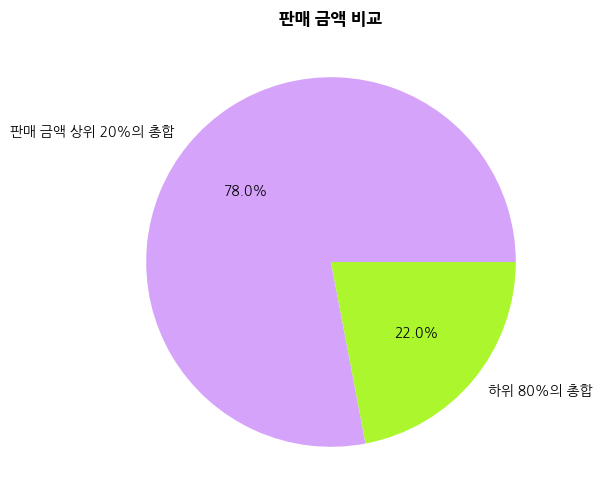

In [106]:
plt.figure(figsize=(6,6))
plt.pie([high20, low80], labels = ['판매 금액 상위 20%의 총합', '하위 80%의 총합'],autopct='%.1f%%', colors=["#d6a3fb","#abf62d"])
plt.title('판매 금액 비교', fontweight = 'bold')
plt.show()

In [107]:
len(high_stock)

923

In [108]:
name_list = []
for code in high_stock:
    try:
        name = retail_df[retail_df['StockCode']==code].iloc[0,2]
        name_list.append(name)
    except IndexError:
        continue
name_list

['REGENCY CAKESTAND 3 TIER',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'JUMBO BAG RED WHITE SPOTTY ',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'PARTY BUNTING',
 "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'CHILLI LIGHTS',
 'JUMBO BAG PINK WITH WHITE SPOTS',
 'BLACK RECORD COVER FRAME',
 'DOOR MAT UNION FLAG',
 'JUMBO BAG STRAWBERRY',
 'RED SPOTTY COIR DOORMAT',
 'WOOD BLACK BOARD ANT WHITE FINISH',
 'LUNCH BAG RED SPOTTY',
 'POPCORN HOLDER , SMALL ',
 'ROTATING SILVER ANGELS T-LIGHT HLDR',
 'PICNIC BASKET WICKER SMALL',
 'VINTAGE UNION JACK BUNTING',
 'RETRO SPOT CAKE STAND',
 'EDWARDIAN PARASOL NATURAL',
 'JUMBO  BAG BAROQUE BLACK WHITE',
 'CREAM HEART CARD HOLDER',
 'RABBIT NIGHT LIGHT',
 'HEART OF WICKER LARGE',
 'VINTAGE UNION JACK MEMOBOARD',
 'SET/5 RED SPOTTY LID GLASS BOWLS',
 'RED HANGING HEART T-LIGHT HOLDER',
 'PLEASE ONE PERSON  METAL SIGN',
 'JUMBO STORAGE BAG SUKI',
 'CHOCOLATE HOT WATER BOTTLE',
 'PAPER CHAIN KIT VINTAGE CHRISTMAS',
 'RETRO SPOT TEA SET CERAMIC 11 PC ',
 'EDWARDIAN PARA

In [109]:
stock_50 = cost_total.head(50)
stock_50

StockCode
22423      269736.70
85123A     242855.86
85099B     168440.36
84879      126354.18
47566      102686.23
22086       78366.93
79321       72229.34
22386       67574.16
21137       67127.15
48138       64614.57
85099F      64089.41
20685       61188.65
82484       60188.09
20725       58925.90
22197       58481.12
84347       57195.97
22502       54589.65
21621       54271.12
21843       54257.44
15056N      53972.31
85099C      52597.46
22189       52458.56
23084       51137.80
22470       51128.98
21623       50966.42
20914       49888.53
21733       48923.35
21181       48338.10
21931       47545.17
22112       47072.36
22910       46051.47
22139       45718.55
15056BL     45604.87
48194       45418.01
22178       45190.22
22411       45016.51
48187       44672.39
22469       44594.85
21754       43659.66
21212       43570.48
22111       43431.40
21929       43399.91
21928       41804.34
21523       41644.13
21731       41475.61
21915       40953.65
22326       40907.17
212

In [125]:
value = stock_50.values.tolist()

In [111]:
sell_dict = dict(zip(name_list[:51],value))
sell_dict

{'REGENCY CAKESTAND 3 TIER': 269736.7,
 'WHITE HANGING HEART T-LIGHT HOLDER': 242855.86000000002,
 'JUMBO BAG RED WHITE SPOTTY ': 168440.36,
 'ASSORTED COLOUR BIRD ORNAMENT': 126354.18,
 'PARTY BUNTING': 102686.23000000001,
 "PAPER CHAIN KIT 50'S CHRISTMAS ": 78366.93000000001,
 'CHILLI LIGHTS': 72229.34,
 'JUMBO BAG PINK WITH WHITE SPOTS': 67574.16,
 'BLACK RECORD COVER FRAME': 67127.15,
 'DOOR MAT UNION FLAG': 64614.57,
 'JUMBO BAG STRAWBERRY': 64089.41,
 'RED SPOTTY COIR DOORMAT': 61188.65,
 'WOOD BLACK BOARD ANT WHITE FINISH': 60188.09,
 'LUNCH BAG RED SPOTTY': 58925.9,
 'POPCORN HOLDER , SMALL ': 58481.119999999995,
 'ROTATING SILVER ANGELS T-LIGHT HLDR': 57195.97,
 'PICNIC BASKET WICKER SMALL': 54589.65,
 'VINTAGE UNION JACK BUNTING': 54271.12,
 'RETRO SPOT CAKE STAND': 54257.439999999995,
 'EDWARDIAN PARASOL NATURAL': 53972.310000000005,
 'JUMBO  BAG BAROQUE BLACK WHITE': 52597.46,
 'CREAM HEART CARD HOLDER': 52458.560000000005,
 'RABBIT NIGHT LIGHT': 51137.8,
 'HEART OF WICKER 

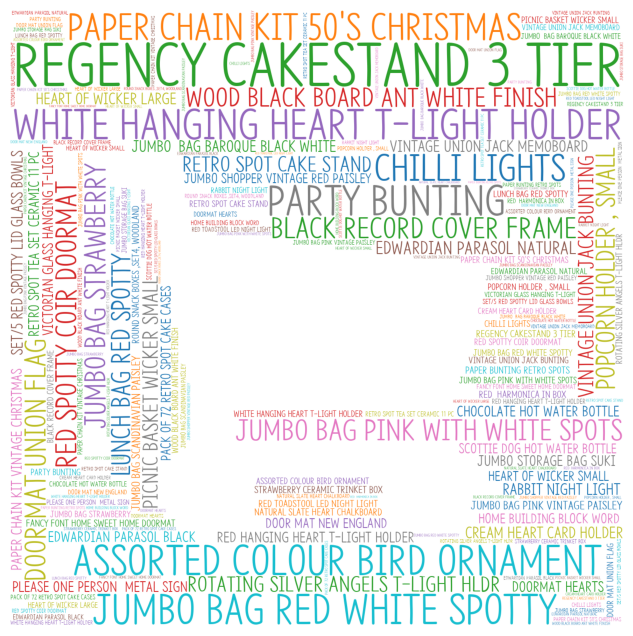

In [126]:
if platform.system() == 'Windows':
    path = r'C:\Users\kdp\AppData\Local\Microsoft\Windows\Fonts\NanumBarunpenR.ttf'

img_mask = np.array(Image.open('cart2.png'))
wc = WordCloud(font_path=path, width=400, height=400, background_color='white',
               max_font_size=200, repeat=True, colormap='tab10', mask=img_mask)
cloud = wc.generate_from_frequencies(sell_dict)

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [124]:
for n in name_list[:8]:
    print(n,'\n')

REGENCY CAKESTAND 3 TIER 

WHITE HANGING HEART T-LIGHT HOLDER 

JUMBO BAG RED WHITE SPOTTY  

ASSORTED COLOUR BIRD ORNAMENT 

PARTY BUNTING 

PAPER CHAIN KIT 50'S CHRISTMAS  

CHILLI LIGHTS 

JUMBO BAG PINK WITH WHITE SPOTS 

